In [1]:
import odrive.core
import time
import math
import numpy as np
from numpy import linalg

In [2]:
my_drive = odrive.core.find_any(consider_usb=True, consider_serial=False, printer=print)

looking for ODrive...
Found ODrive via PyUSB
ConfigurationValue 1
	InterfaceNumber 0,0
		EndpointAddress 130
	InterfaceNumber 1,1
		EndpointAddress 1
		EndpointAddress 129

EndpointAddress for writing 1

EndpointAddress for reading 129

Connecting to device on USB device bus 0 device 2
JSON: [{"name":"","id":0,"type":"json","access":"rw"},{"name":"vbus_voltage","id":1,"type":"float","access":"r"},{"name":"serial_number","id":2,"type":"uint64","access":"r"},{"name":"run_anticogging_calibration","id":3,"type":"function","arguments":[]},{"name":"config","id":5,"type":"object","members":[{"name":"brake_resistance","id":6,"type":"float","access":"rw"}]},{"name":"axis0","id":8,"type":"object","members":[{"name":"config","id":9,"type":"object","members":[{"name":"enable_control_at_start","id":10,"type":"bool","access":"rw"},{"name":"do_calibration_at_start","id":11,"type":"bool","access":"rw"}]}]},{"name":"motor0","id":14,"type":"object","members":[{"name":"config","id":15,"type":"object","me

In [3]:
# define handles to the motor functions
m0=my_drive.motor0
m1=my_drive.motor1 

m0.config.pos_gain=20
m1.config.pos_gain=20

encoder2angle = 4*2048

#Set home pos
def set_home():
       
    home0, home1 = (m0.encoder.pll_pos/encoder2angle*2*np.pi,m1.encoder.pll_pos/encoder2angle*2*np.pi)
    
    return(home0, home1)


        

In [4]:
def get_joint_pos():
    joint_0_pos = m0.encoder.pll_pos/encoder2angle*2*np.pi
    joint_1_pos = m1.encoder.pll_pos/encoder2angle*2*np.pi
    
    
    return (joint_0_pos, joint_1_pos)

In [5]:
print(get_joint_pos())
home0, home1 = set_home()

(-0.006748400137953188, -0.0009555415164253269)


In [6]:
def return_home(home0, home1):
    
    m0.set_pos_setpoint(home0*encoder2angle/(2*np.pi), 2, 0)
    m1.set_pos_setpoint(home1*encoder2angle/(2*np.pi), 2, 0)
    



In [7]:
def jump(target0, target1):
    
    m0.set_pos_setpoint(target0*encoder2angle/(2*np.pi), 0, 0)
    m1.set_pos_setpoint(target1*encoder2angle/(2*np.pi), 0, 0)


In [8]:
return_home(home0, home1)

In [39]:
m0.set_pos_setpoint((home0-np.pi/10)*encoder2angle/(2*np.pi), 2, 0)
m1.set_pos_setpoint((home1+np.pi/10)*encoder2angle/(2*np.pi), 2, 0)

In [9]:
def touchdown_pos():
    touch0, touch1 = get_joint_pos()
    return(touch0, touch1)


In [20]:
my_drive.motor1.current_control.Iq_measured



-9.955525398254395

In [23]:
jump(home0-np.pi/5, home1+np.pi/5)

In [27]:
def jumping(home0, home1):
    
    #From home postion, move down to jumping position
    jump_pos = np.pi/5
    jump_pos_0 = (home0-jump_pos)
    jump_pos_1 = (home1+jump_pos)
    jump(jump_pos_0, jump_pos_1)
    
    delta_jump = 50
    delta_return_home = 500
    
   
    time_end = time.time() + 10
    
    while True:
        time.sleep(0.2)
        
        if time.time() > time_end:
            break
            
        m0, m1 = get_joint_pos()
        delta0 = abs(m0 + home0)
        delta1 = abs(m1 + home1)
        
        print(delta0, delta1)
        
        if delta0 < jump_pos and delta1 < np.pi/7:
            jump(jump_pos_0, jump_pos_1)
            
        if delta0 > jump_pos and delta1 > np.pi/5:
            return_home(home0+np.pi/2, home1-np.pi/2)
            
    return_home(home0, home1)
            
            
        
  

In [29]:
jumping(home0, home1)

0.9294773625887006 0.3777056785575869
1.1788767602632508 0.5395281291007635
1.1313529418940311 0.5230845085693938
1.1275033841502136 0.5223173309219368
1.1252001659262154 0.5257813804935059
1.120593729478219 0.5319216104758737
1.113048536379212 0.5416919370834798
0.951714466407618 0.724373141734633
0.29666623619667076 0.1508694515868058
0.393631138259764 0.4878818778042367
0.8203463890513256 0.9445616934030546
0.19776446570666176 0.28125078484696014
0.3551344607071933 0.3903387368894601
0.734443839436758 0.7819631004504313
0.02679825490631109 0.027829447208181
0.3126037104793033 0.33187664493152585
0.9657263659909067 1.055409500784879
0.2865993702427249 0.3424663695103464
0.3709054900224391 0.3990492788270665
0.7068281593042623 0.751279692809057
0.06092160615514423 0.05853703688540557
0.33312011835004207 0.3703853067090019
1.000501216102997 1.0983244484104184
0.23363766300932104 0.2847717828935189
0.3350576070542235 0.3601196945564791
0.735971828112191 0.7750557864473635
0.120741847851

In [17]:
m0, m1 = get_joint_pos()
delta = np.array([m0-home0, m1-home1])
np.linalg.norm(delta)

0.0006243895896007398

In [ ]:
home0, home1 = set_home()
jump_pos = np.pi/4
jump_pos_0 = (home0-jump_pos)
jump_pos_1 = (home1+jump_pos)
jump(jump_pos_0, jump_pos_1)

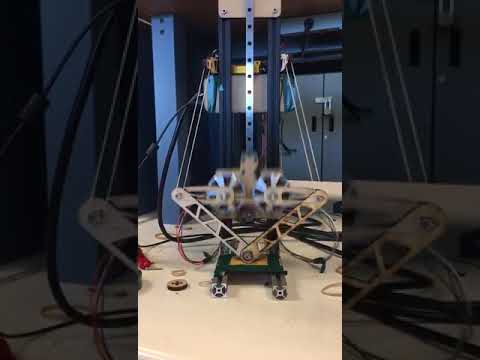

In [30]:
import matplotlib.pyplot as plt

from IPython.lib.display import YouTubeVideo # for youtube videos

YouTubeVideo('Nfk72VTZwKQ')

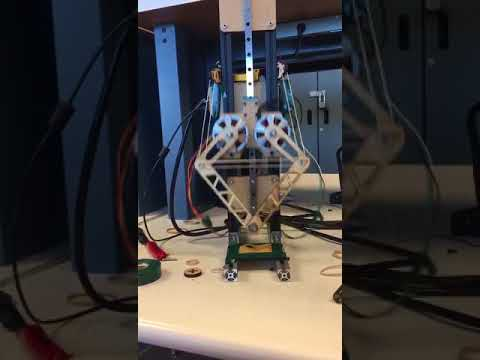

In [31]:
YouTubeVideo('HRPjZkalBrA')